In [ ]:
# primer: generiraj vse povezane grafe z n=6
n = 6
vsi_grafi = [G for G in graphs(n) if G.is_connected()]
print("Število povezanih grafov:", len(vsi_grafi))

def cyclomatic_number(G):
    return G.size() - G.order() + G.connected_components_number()

k = 2
grafi_k = [G for G in vsi_grafi if cyclomatic_number(G) == k]
print("Število grafov z µ(G)=2:", len(grafi_k))

def all_simple_paths(G, start, end, visited=None):
    if visited is None:
        visited = []
    visited = visited + [start]
    if start == end:
        return [visited]
    paths = []
    for neighbor in G.neighbors(start):
        if neighbor not in visited:
            newpaths = all_simple_paths(G, neighbor, end, visited)
            for p in newpaths:
                paths.append(p)
    return paths

def subpath_number(G):
    n = 0
    V = list(G.vertices())
    for i in range(len(V)):
        for j in range(i, len(V)):
            n += len(all_simple_paths(G, V[i], V[j]))
    return n

for G in grafi_k:
    print(f"|V|={G.order()}, |E|={G.size()}, µ(G)={cyclomatic_number(G)}, p_n(G)={subpath_number(G)}")


In [ ]:
# === Projekt: Subpath number pri grafih z danim ciklomatskim številom ===

import itertools
from sage.all import *
import pandas as pd


# -------------------------------
# Funkcija za ciklomatsko število
# -------------------------------
def cyclomatic_number(G):
    return G.size() - G.order() + G.connected_components_number()

# -------------------------------
# Funkcija za štetje vseh enostavnih poti
# -------------------------------
def all_simple_paths(G, start, end, visited=None):
    if visited is None:
        visited = []
    visited = visited + [start]
    if start == end:
        return [visited]
    paths = []
    for neighbor in G.neighbors(start):
        if neighbor not in visited:
            newpaths = all_simple_paths(G, neighbor, end, visited)
            for p in newpaths:
                paths.append(p)
    return paths

def subpath_number(G):
    """Vrne skupno število enostavnih poti (vključno z dolžino 0)."""
    V = list(G.vertices())
    n_paths = 0
    for i in range(len(V)):
        for j in range(i, len(V)):
            n_paths += len(all_simple_paths(G, V[i], V[j]))
    return n_paths

# -------------------------------
# Glavni izračun
# -------------------------------
rezultati = []  # seznam (n, µ, subpath_number)

# Za n = 3 do 7 (manjše vrednosti, da se ne zatakne)
for n in range(3, 10):
    print(f"\nObdelujem vse povezane grafe z n = {n} vozlišči ...")
    for G in graphs(n):
        if not G.is_connected():
            continue
        mu = cyclomatic_number(G)
        pn = subpath_number(G)
        rezultati.append((n, mu, pn))

print("\n--- Izračun končan ---")

# Pretvori rezultate v Sage DataFrame
df = pd.DataFrame(rezultati, columns=["n", "µ(G)", "p_n(G)"])


# Izračunaj minimalni in maksimalni subpath number za vsako kombinacijo (n, µ)
tabela = (
    df.groupby(["n", "µ(G)"])
    .agg(min_pn=("p_n(G)", "min"), max_pn=("p_n(G)", "max"), count=("p_n(G)", "count"))
    .reset_index()
)

# Izpiši tabelo rezultatov
print("\nTabela ekstremov (min / max subpath number):")
show(tabela)

# Shranimo tabelo kot CSV
tabela.to_csv("rezultati_subpath.csv", index=False)
print("\nRezultati shranjeni v datoteko 'rezultati_subpath.csv'.")


>>> ZAČENJAM n = 3

*** OBRAVNAVAM µ = 0 (n=3) ***
  MIN=6, MAX=6


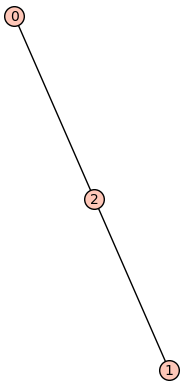

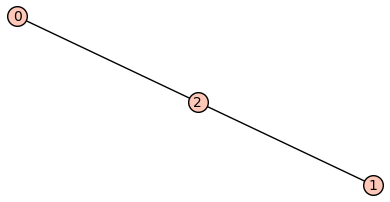


*** OBRAVNAVAM µ = 1 (n=3) ***
  MIN=9, MAX=9


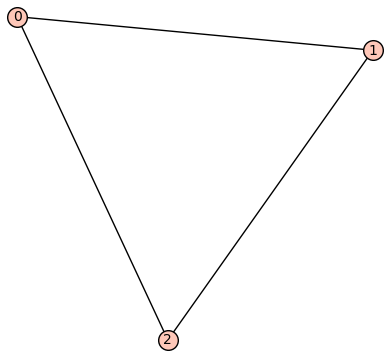

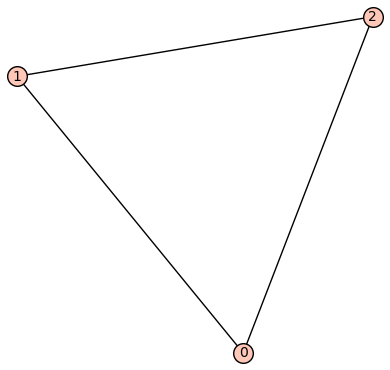


>>> ZAČENJAM n = 4

*** OBRAVNAVAM µ = 0 (n=4) ***
  MIN=10, MAX=10


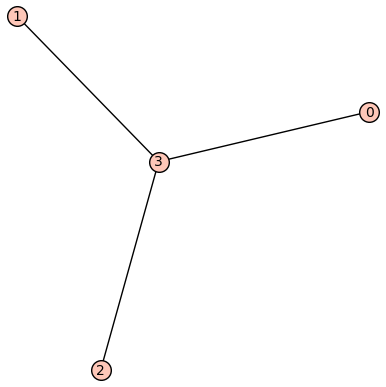

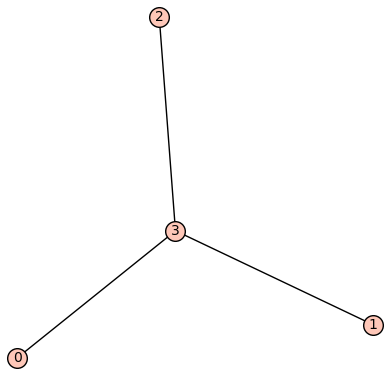


*** OBRAVNAVAM µ = 1 (n=4) ***
  MIN=15, MAX=16


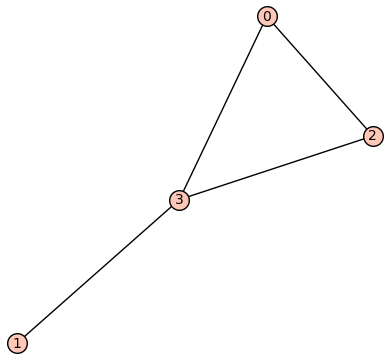

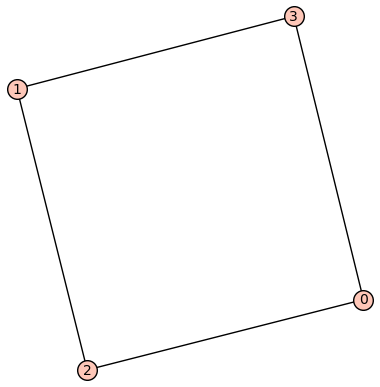


*** OBRAVNAVAM µ = 2 (n=4) ***
  MIN=23, MAX=23


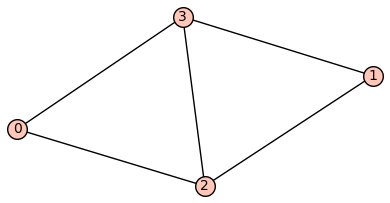

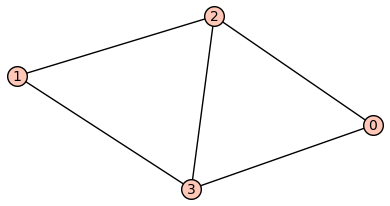


*** OBRAVNAVAM µ = 3 (n=4) ***
  MIN=34, MAX=34


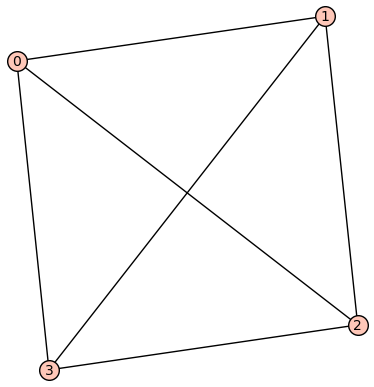

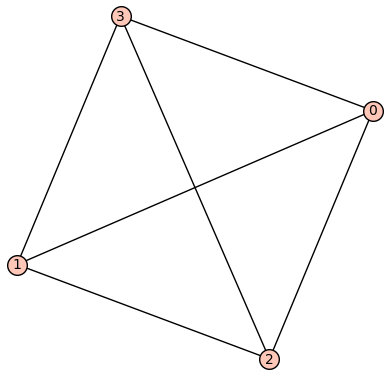


>>> ZAČENJAM n = 5

*** OBRAVNAVAM µ = 0 (n=5) ***
  MIN=15, MAX=15


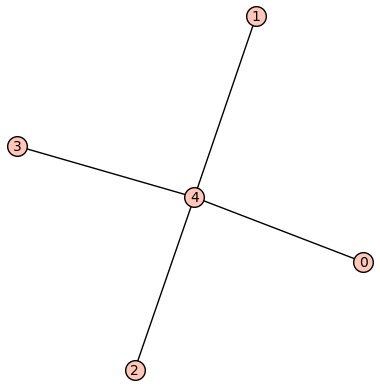

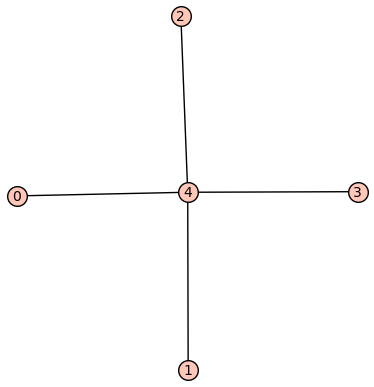


*** OBRAVNAVAM µ = 1 (n=5) ***
  MIN=22, MAX=25


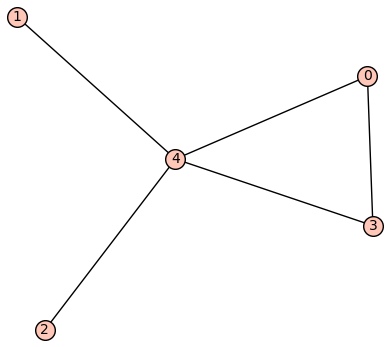

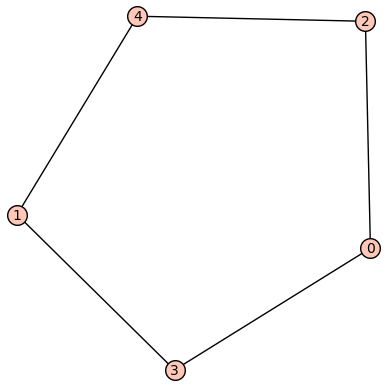


*** OBRAVNAVAM µ = 2 (n=5) ***
  MIN=33, MAX=38


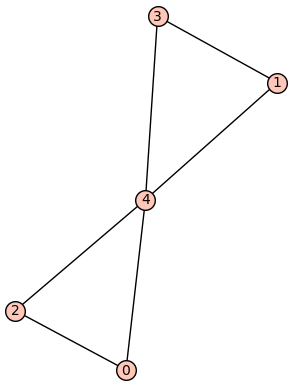

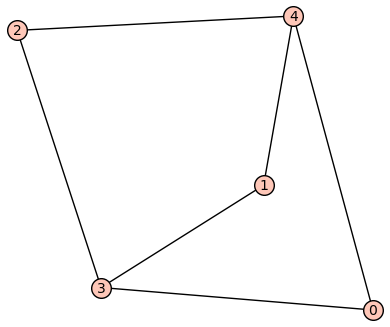


*** OBRAVNAVAM µ = 3 (n=5) ***
  MIN=51, MAX=57


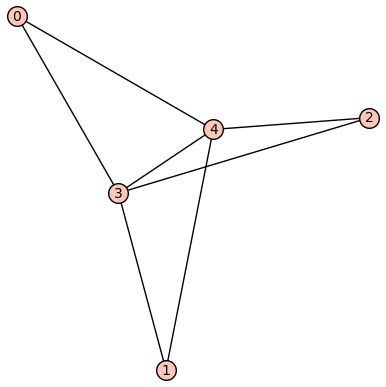

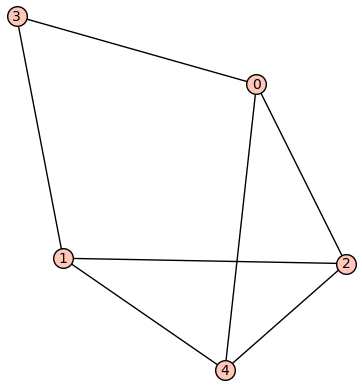


*** OBRAVNAVAM µ = 4 (n=5) ***
  MIN=78, MAX=83


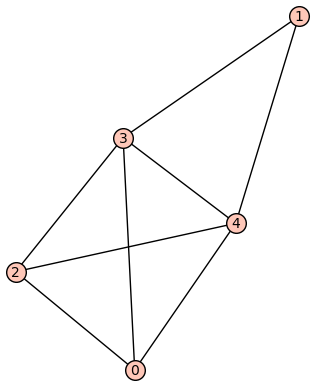

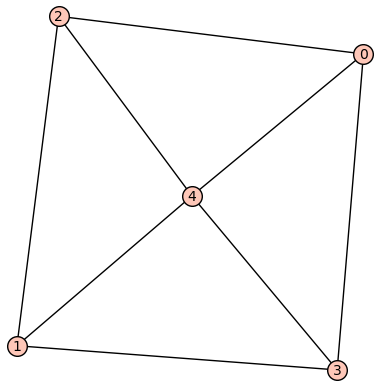


*** OBRAVNAVAM µ = 5 (n=5) ***
  MIN=116, MAX=116


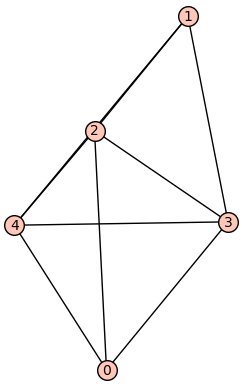

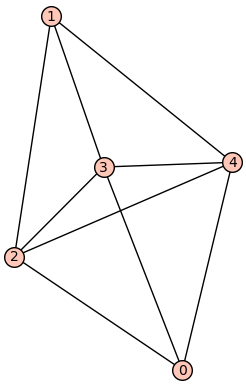


*** OBRAVNAVAM µ = 6 (n=5) ***
  MIN=165, MAX=165


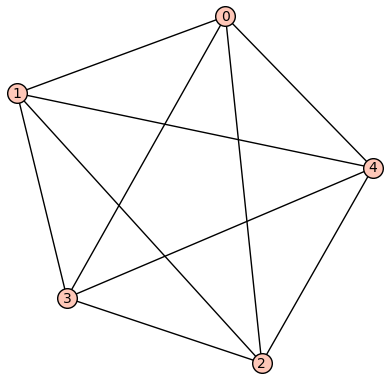

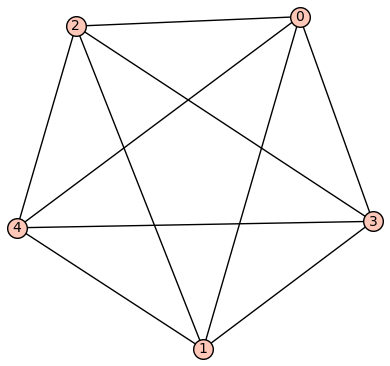


>>> ZAČENJAM n = 6

*** OBRAVNAVAM µ = 0 (n=6) ***
  MIN=21, MAX=21


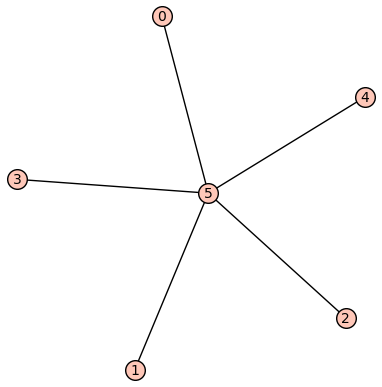

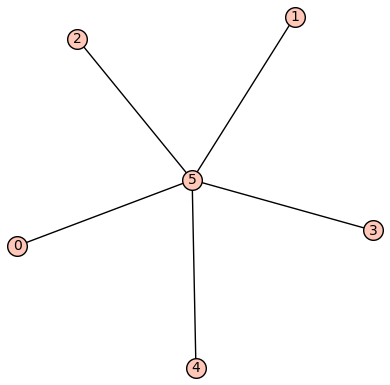


*** OBRAVNAVAM µ = 1 (n=6) ***
  MIN=30, MAX=36


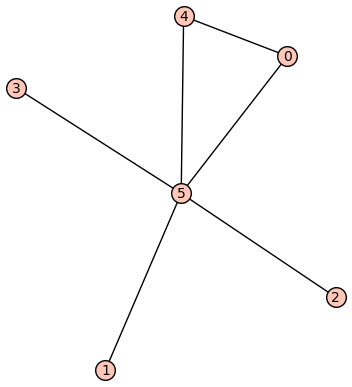

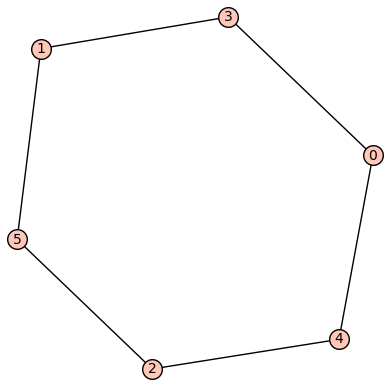


*** OBRAVNAVAM µ = 2 (n=6) ***
  MIN=43, MAX=56


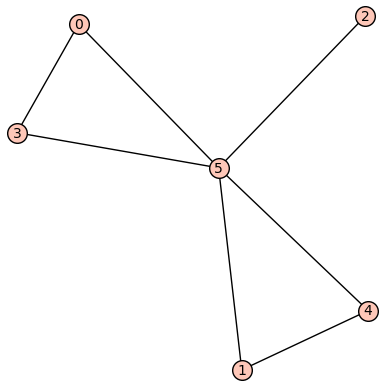

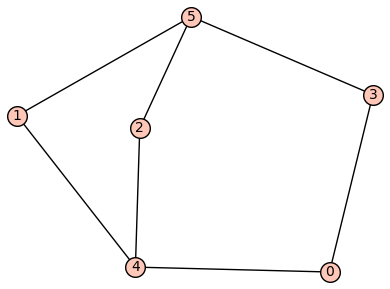


*** OBRAVNAVAM µ = 3 (n=6) ***
  MIN=67, MAX=88


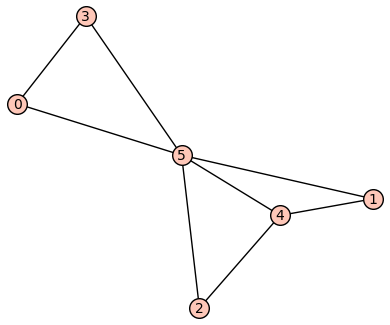

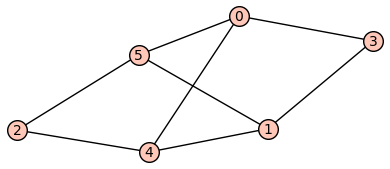


*** OBRAVNAVAM µ = 4 (n=6) ***
  MIN=99, MAX=141


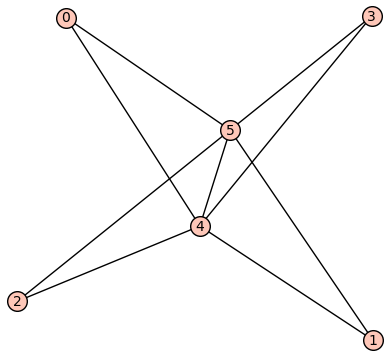

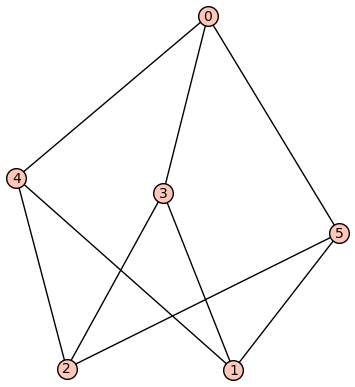


*** OBRAVNAVAM µ = 5 (n=6) ***
  MIN=154, MAX=196


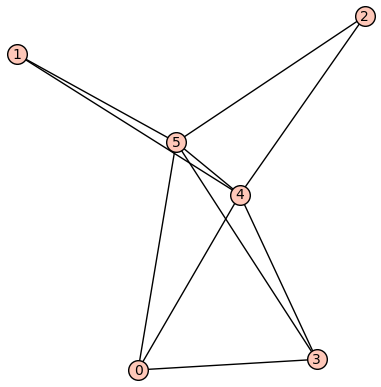

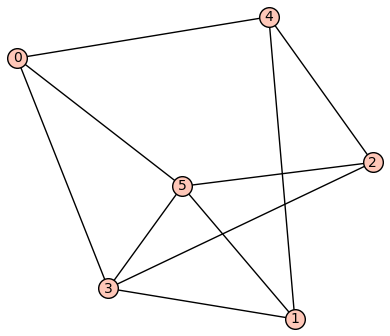


*** OBRAVNAVAM µ = 6 (n=6) ***
  MIN=231, MAX=279


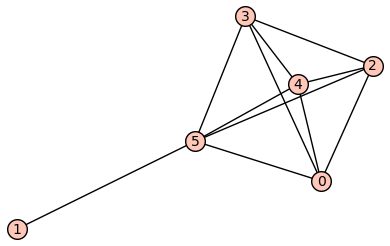

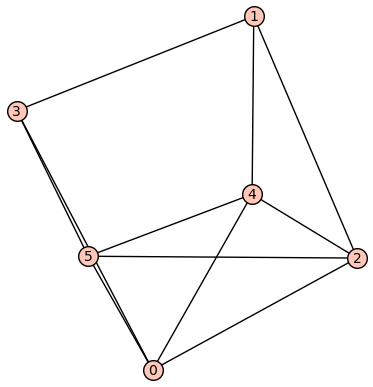


*** OBRAVNAVAM µ = 7 (n=6) ***
  MIN=345, MAX=402


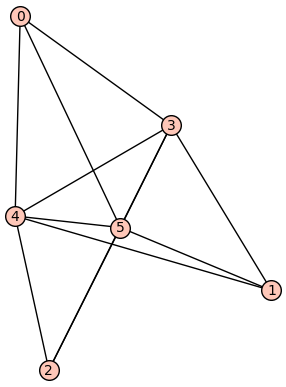

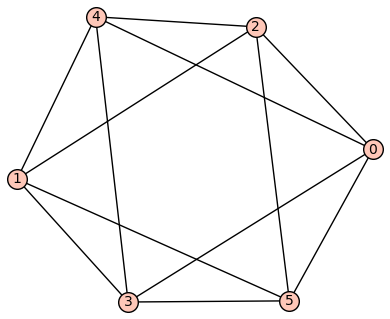


*** OBRAVNAVAM µ = 8 (n=6) ***
  MIN=508, MAX=535


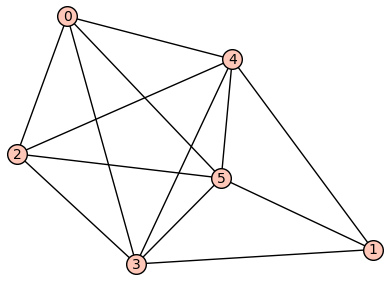

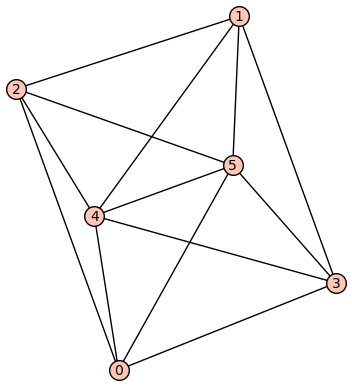


*** OBRAVNAVAM µ = 9 (n=6) ***
  MIN=720, MAX=720


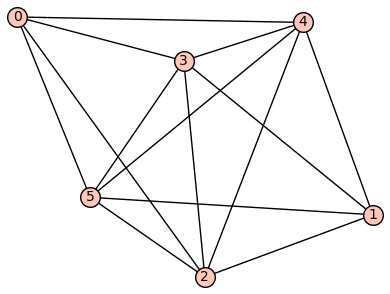

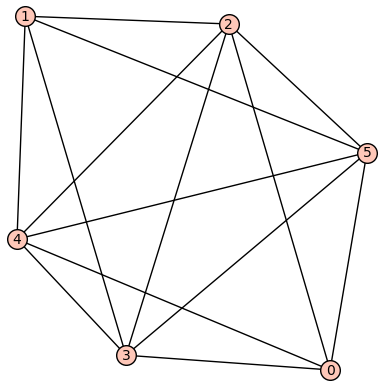


*** OBRAVNAVAM µ = 10 (n=6) ***
  MIN=981, MAX=981


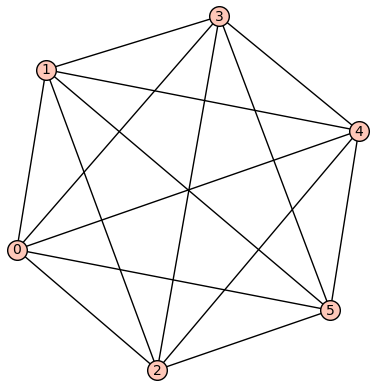

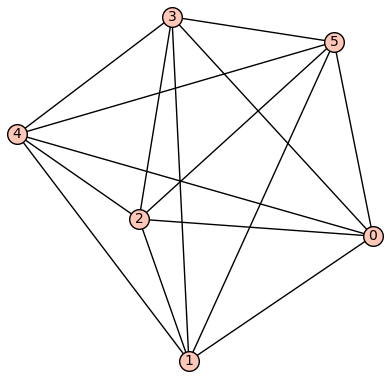


>>> ZAČENJAM n = 7

*** OBRAVNAVAM µ = 0 (n=7) ***
  MIN=28, MAX=28


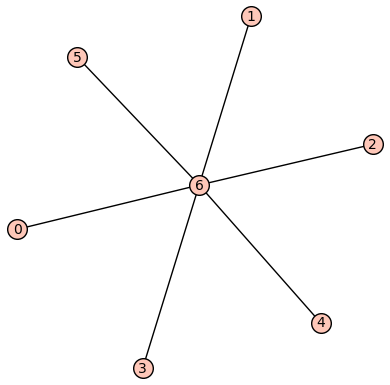

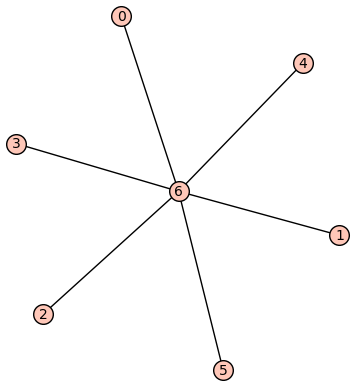


*** OBRAVNAVAM µ = 1 (n=7) ***
  MIN=39, MAX=49


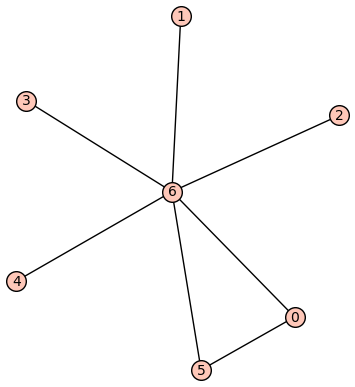

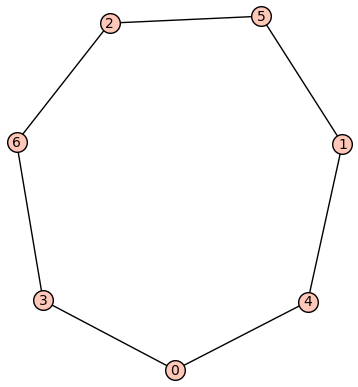


*** OBRAVNAVAM µ = 2 (n=7) ***
  MIN=54, MAX=78


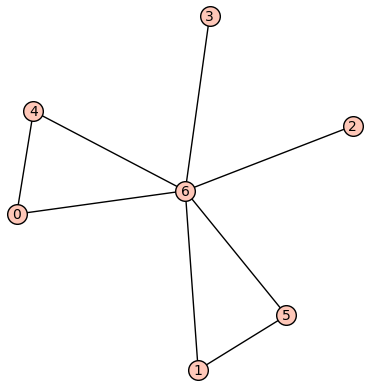

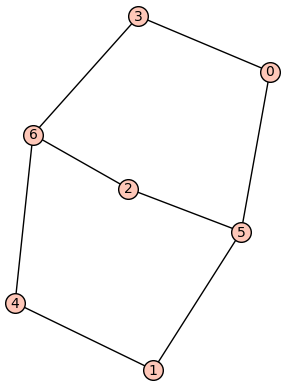


*** OBRAVNAVAM µ = 3 (n=7) ***
  MIN=73, MAX=125


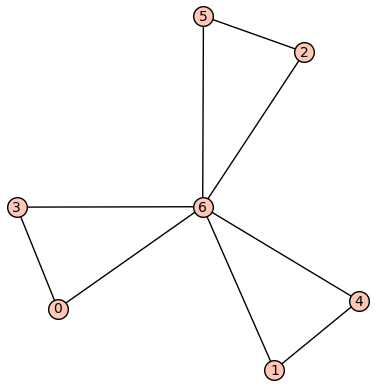

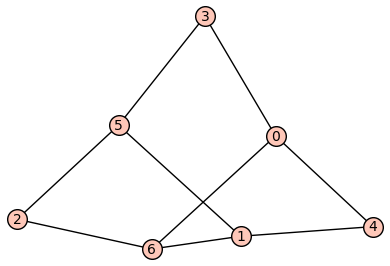


*** OBRAVNAVAM µ = 4 (n=7) ***
  MIN=123, MAX=204


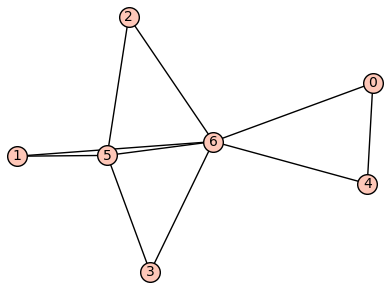

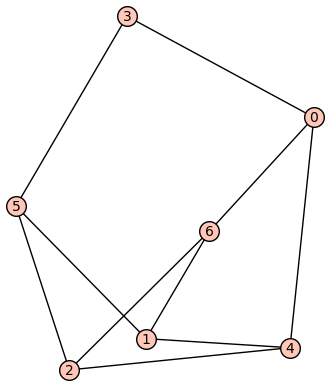


*** OBRAVNAVAM µ = 5 (n=7) ***
  MIN=173, MAX=306


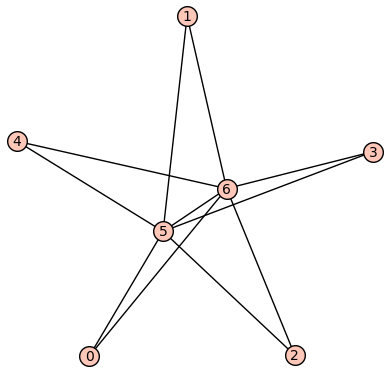

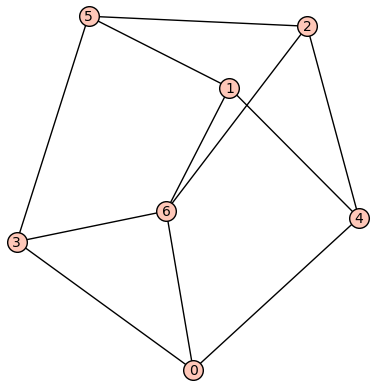


*** OBRAVNAVAM µ = 6 (n=7) ***
  MIN=268, MAX=445


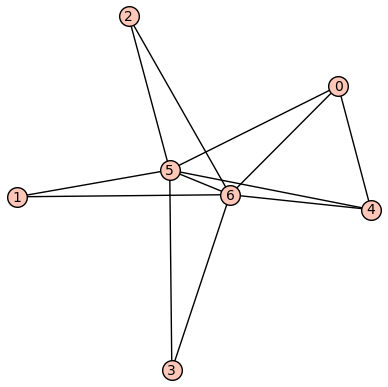

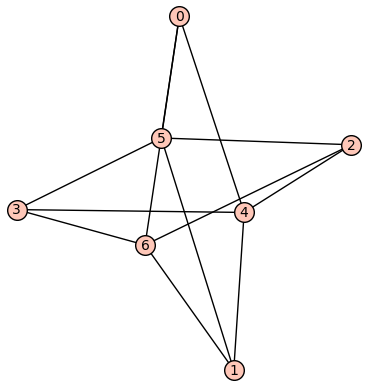


*** OBRAVNAVAM µ = 7 (n=7) ***
  MIN=418, MAX=650


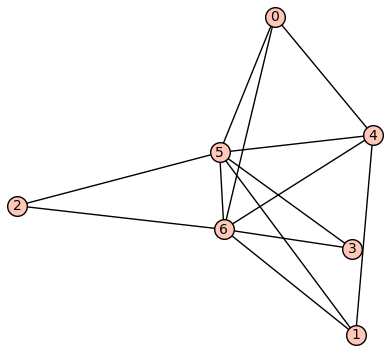

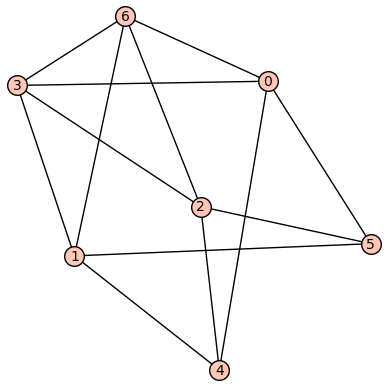


*** OBRAVNAVAM µ = 8 (n=7) ***
  MIN=623, MAX=939


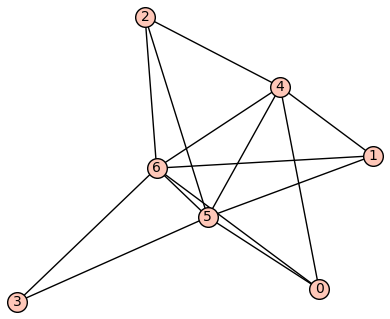

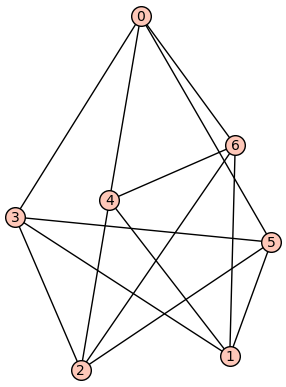


*** OBRAVNAVAM µ = 9 (n=7) ***
  MIN=883, MAX=1267


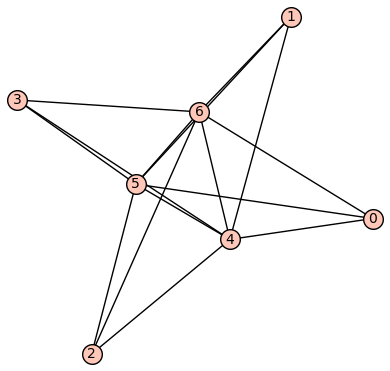

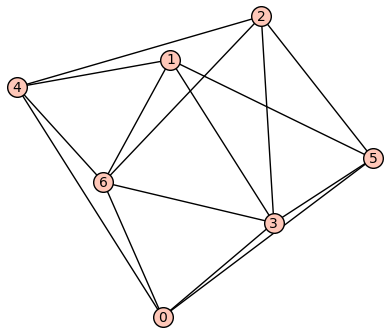


*** OBRAVNAVAM µ = 10 (n=7) ***
  MIN=1308, MAX=1712


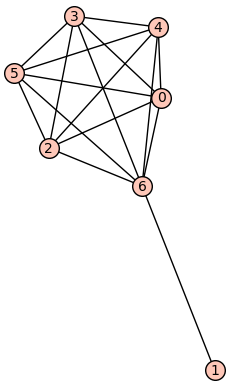

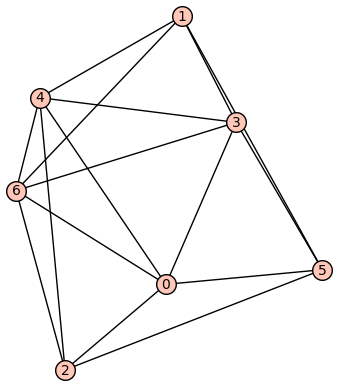


*** OBRAVNAVAM µ = 11 (n=7) ***
  MIN=1895, MAX=2342


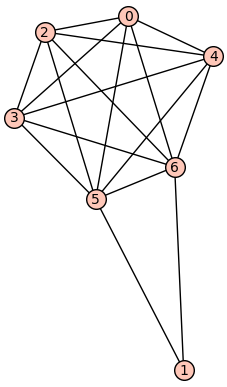

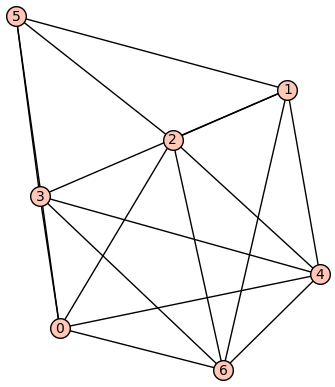


*** OBRAVNAVAM µ = 12 (n=7) ***
  MIN=2743, MAX=3112


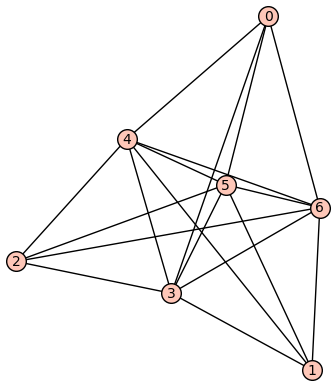

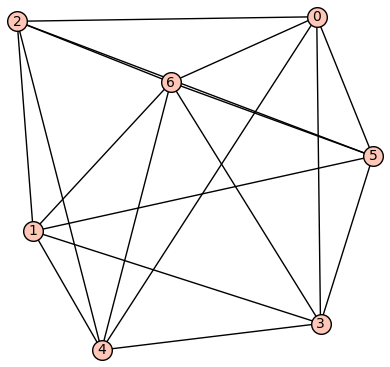


*** OBRAVNAVAM µ = 13 (n=7) ***
  MIN=3852, MAX=4015


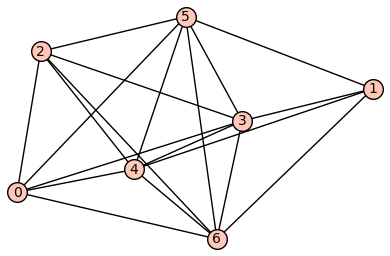

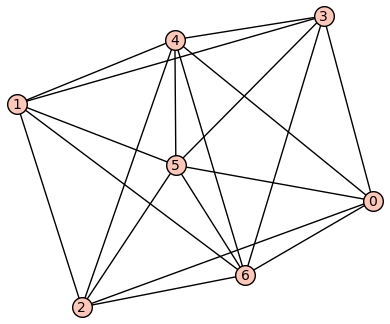


*** OBRAVNAVAM µ = 14 (n=7) ***
  MIN=5222, MAX=5222


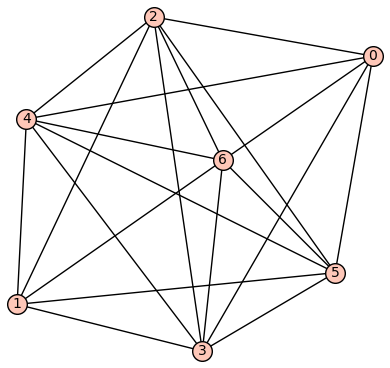

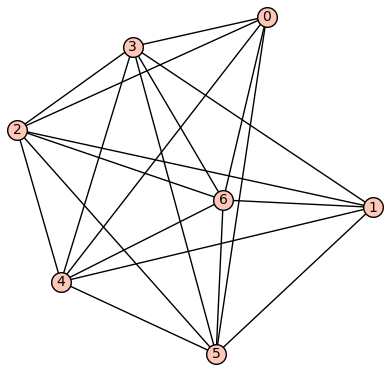


*** OBRAVNAVAM µ = 15 (n=7) ***
  MIN=6853, MAX=6853


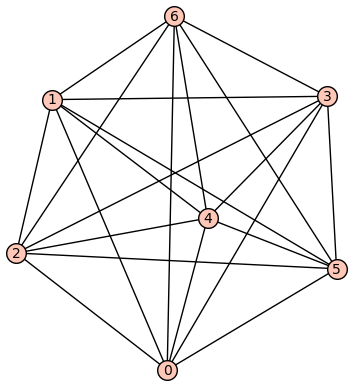

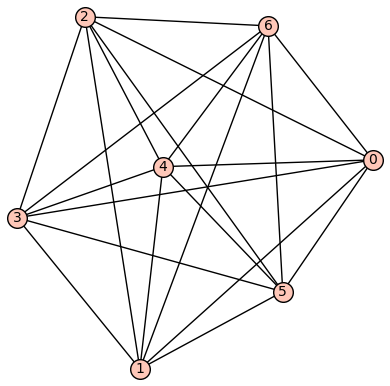


>>> ZAČENJAM n = 8

*** OBRAVNAVAM µ = 0 (n=8) ***
  MIN=36, MAX=36


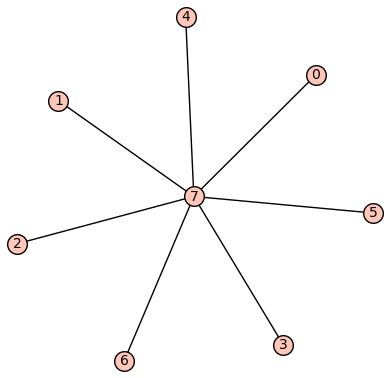

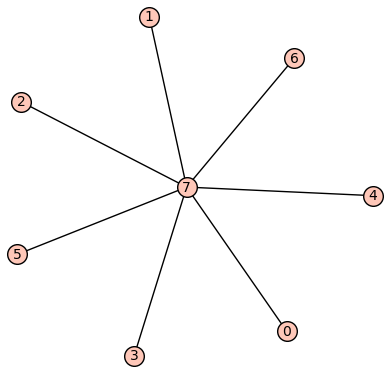


*** OBRAVNAVAM µ = 1 (n=8) ***
  MIN=49, MAX=64


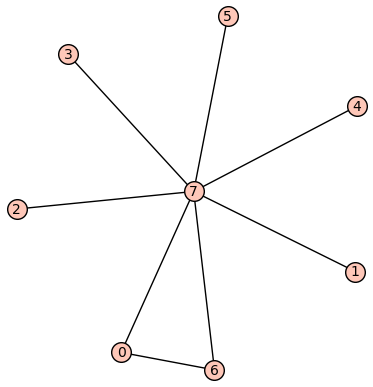

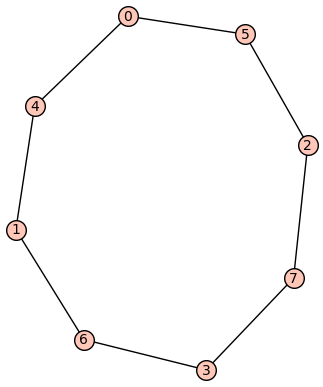


*** OBRAVNAVAM µ = 2 (n=8) ***
  MIN=66, MAX=104


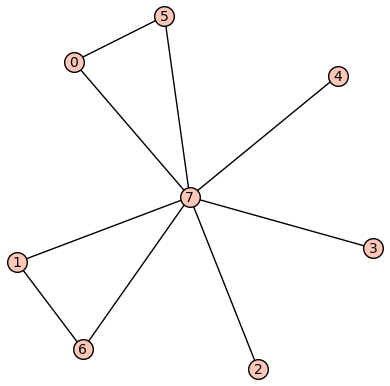

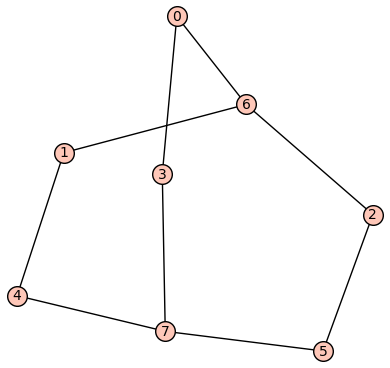


*** OBRAVNAVAM µ = 3 (n=8) ***
  MIN=87, MAX=170


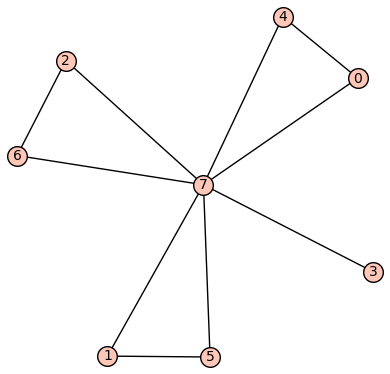

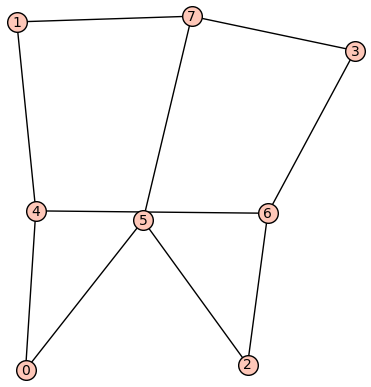


*** OBRAVNAVAM µ = 4 (n=8) ***
  MIN=127, MAX=281


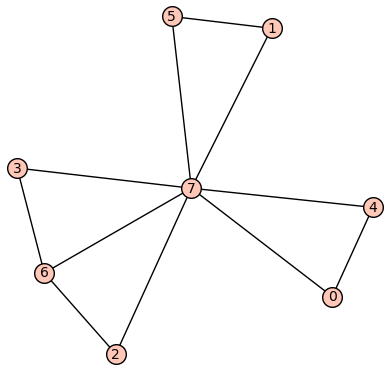

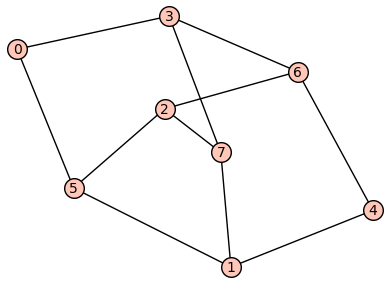


*** OBRAVNAVAM µ = 5 (n=8) ***
  MIN=186, MAX=460


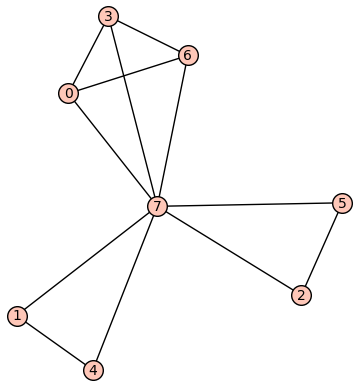

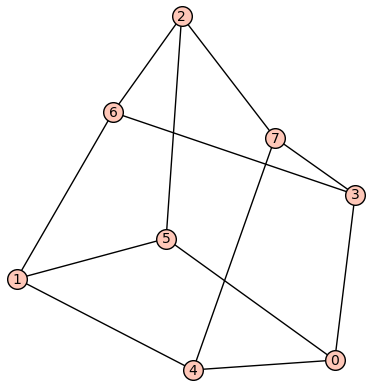


*** OBRAVNAVAM µ = 6 (n=8) ***
  MIN=279, MAX=667


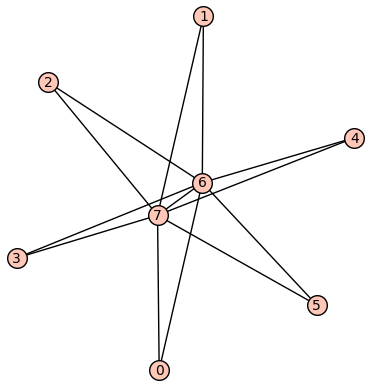

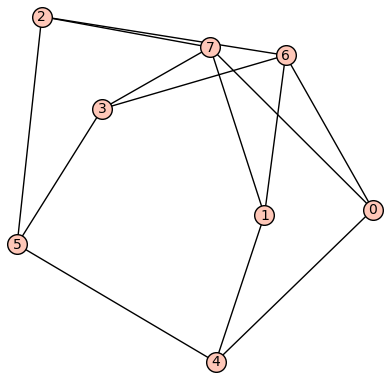


*** OBRAVNAVAM µ = 7 (n=8) ***
  MIN=426, MAX=986


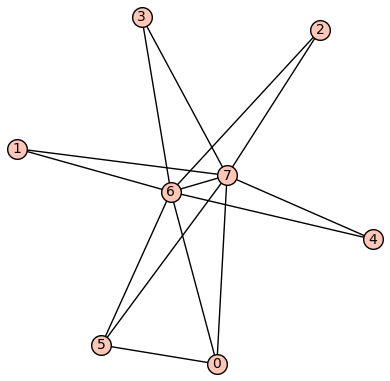

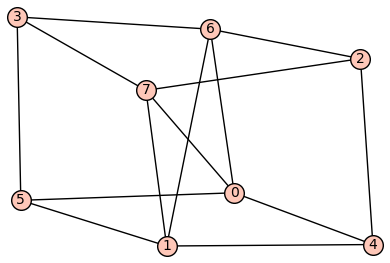


*** OBRAVNAVAM µ = 8 (n=8) ***
  MIN=653, MAX=1478


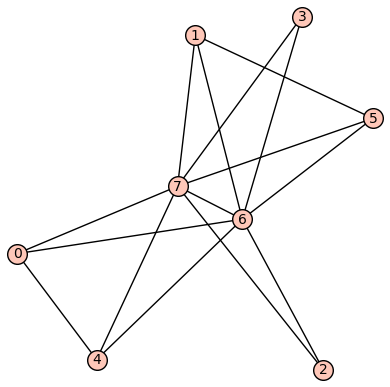

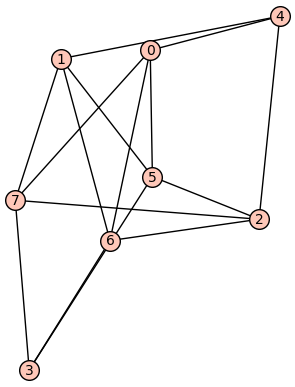


*** OBRAVNAVAM µ = 9 (n=8) ***
  MIN=1005, MAX=2232


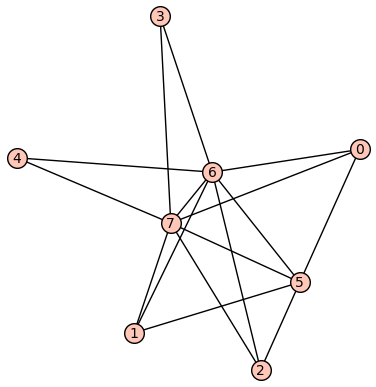

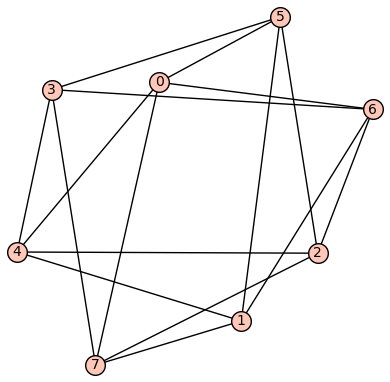


*** OBRAVNAVAM µ = 10 (n=8) ***
  MIN=1437, MAX=2965


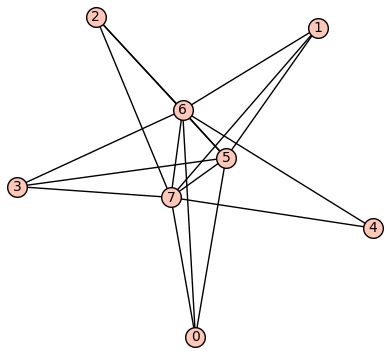

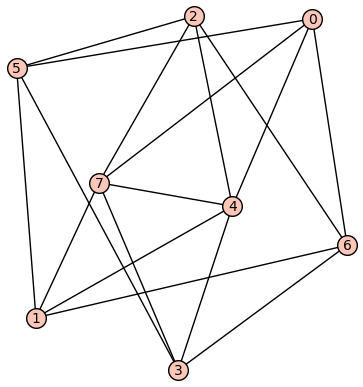


*** OBRAVNAVAM µ = 11 (n=8) ***
  MIN=1964, MAX=4022


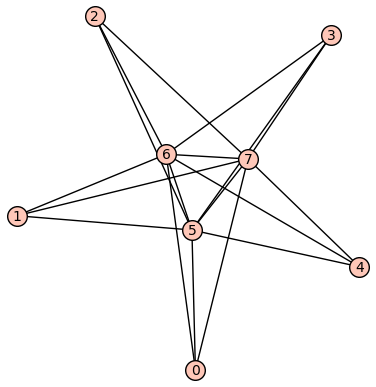

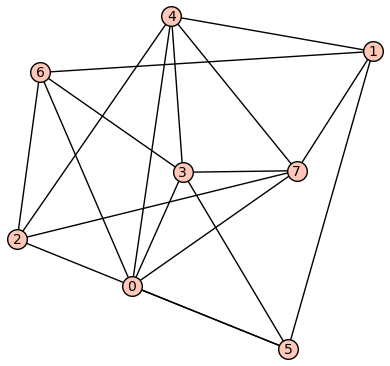


*** OBRAVNAVAM µ = 12 (n=8) ***
  MIN=3039, MAX=5436


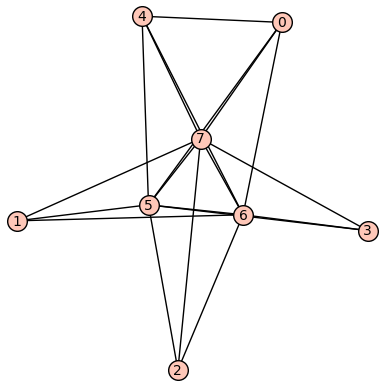

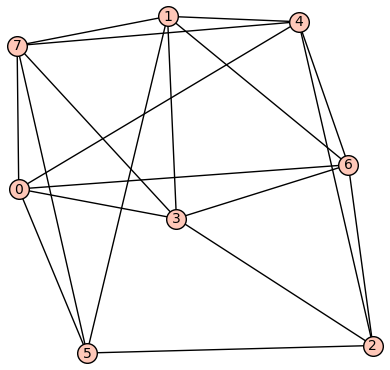


*** OBRAVNAVAM µ = 13 (n=8) ***
  MIN=4571, MAX=7468


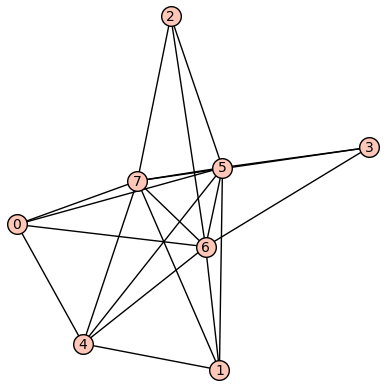

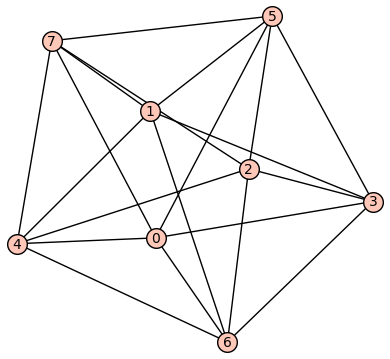


*** OBRAVNAVAM µ = 14 (n=8) ***
  MIN=6560, MAX=9677


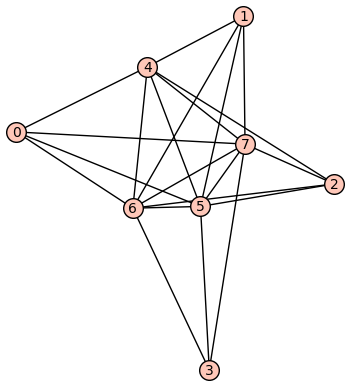

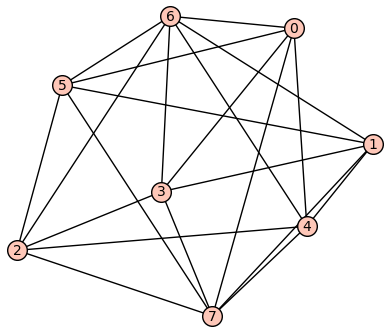


*** OBRAVNAVAM µ = 15 (n=8) ***
  MIN=8811, MAX=12558


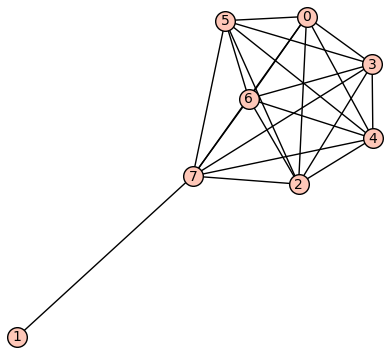

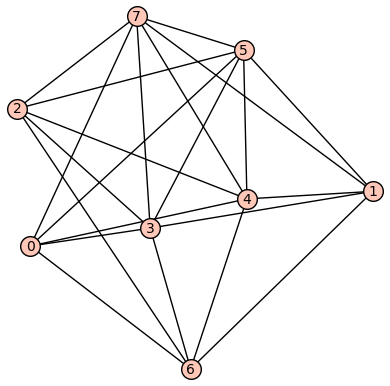


*** OBRAVNAVAM µ = 16 (n=8) ***
  MIN=12399, MAX=16475


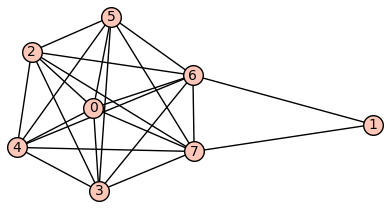

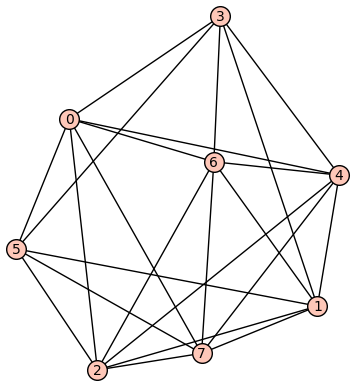


*** OBRAVNAVAM µ = 17 (n=8) ***
  MIN=17618, MAX=21680


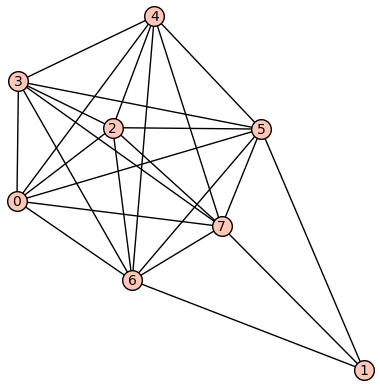

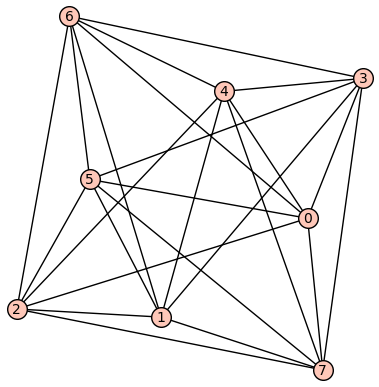


*** OBRAVNAVAM µ = 18 (n=8) ***
  MIN=24468, MAX=27099


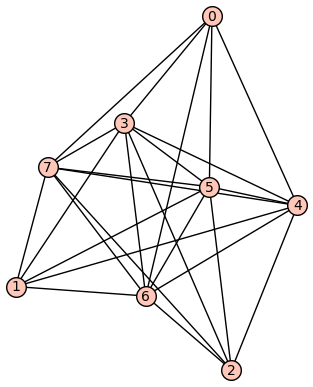

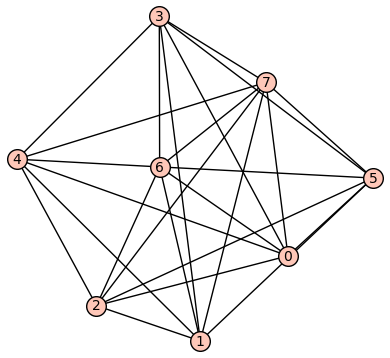


*** OBRAVNAVAM µ = 19 (n=8) ***
  MIN=32949, MAX=34058


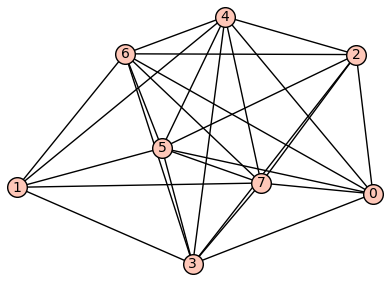

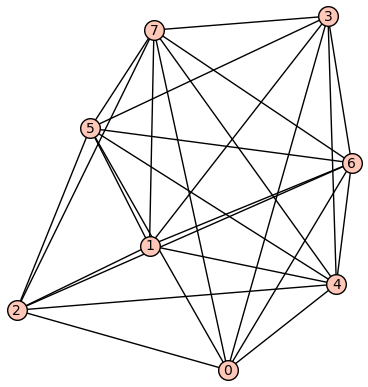


*** OBRAVNAVAM µ = 20 (n=8) ***
  MIN=43061, MAX=43061


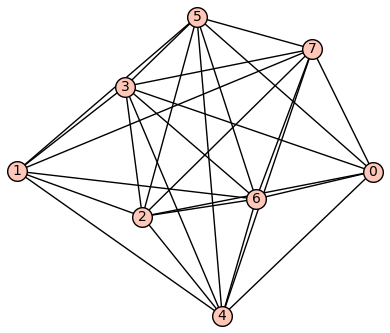

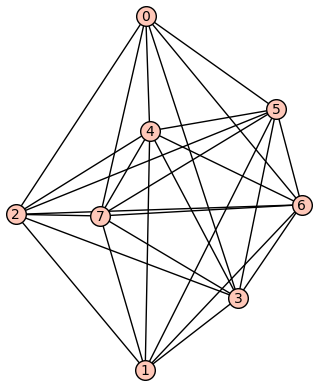


*** OBRAVNAVAM µ = 21 (n=8) ***
  MIN=54804, MAX=54804


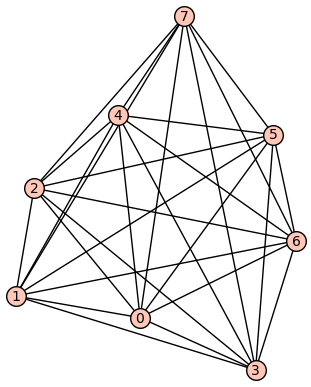

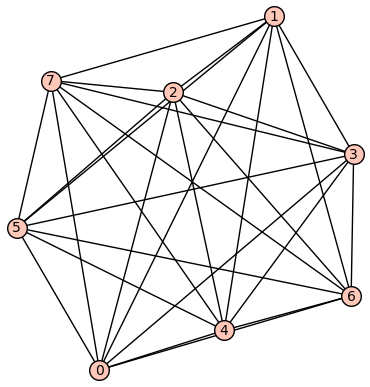


>>> ZAČENJAM n = 9

*** OBRAVNAVAM µ = 0 (n=9) ***
  MIN=45, MAX=45


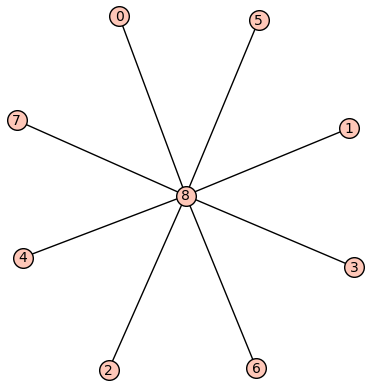

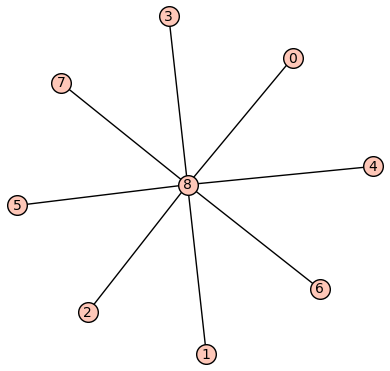


*** OBRAVNAVAM µ = 1 (n=9) ***
  MIN=60, MAX=81


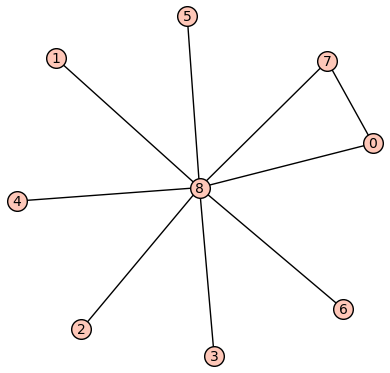

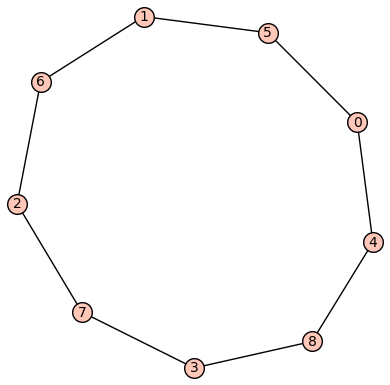


*** OBRAVNAVAM µ = 2 (n=9) ***
  MIN=79, MAX=133


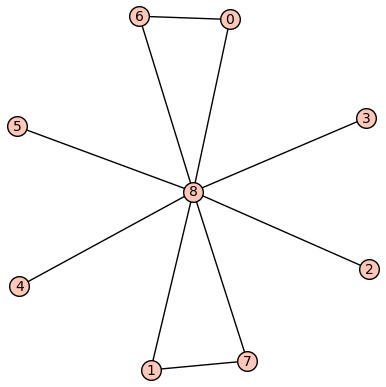

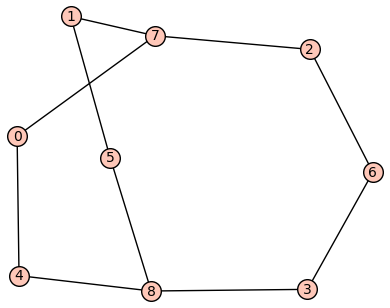


*** OBRAVNAVAM µ = 3 (n=9) ***
  MIN=102, MAX=221


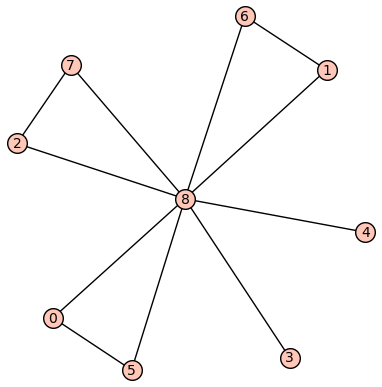

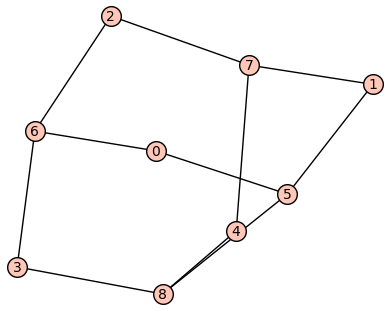


*** OBRAVNAVAM µ = 4 (n=9) ***
  MIN=129, MAX=372


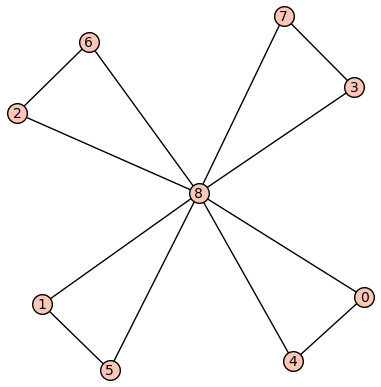

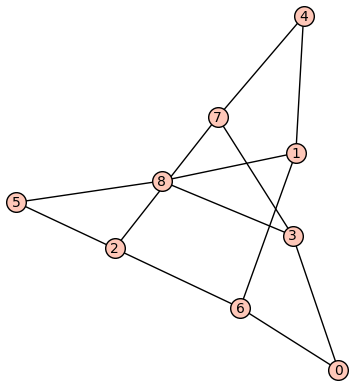


*** OBRAVNAVAM µ = 5 (n=9) ***
  MIN=206, MAX=615


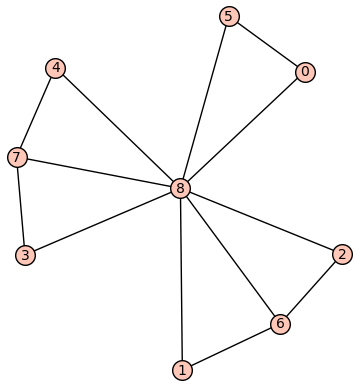

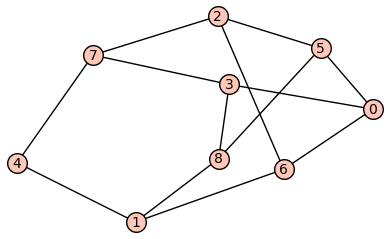


*** OBRAVNAVAM µ = 6 (n=9) ***
  MIN=295, MAX=969


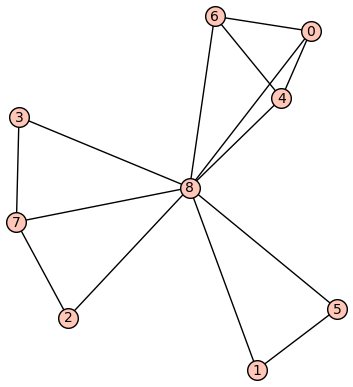

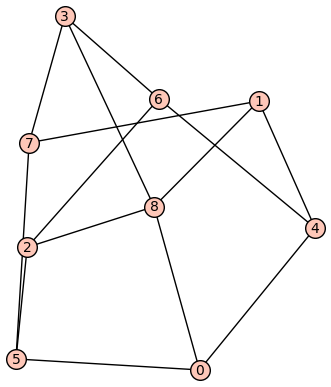


*** OBRAVNAVAM µ = 7 (n=9) ***
  MIN=420, MAX=1434


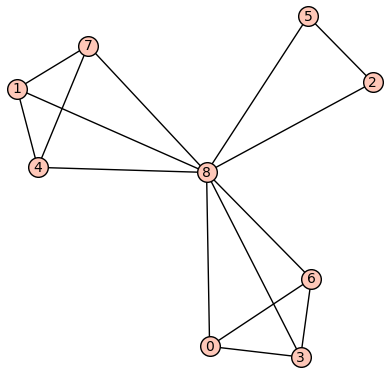

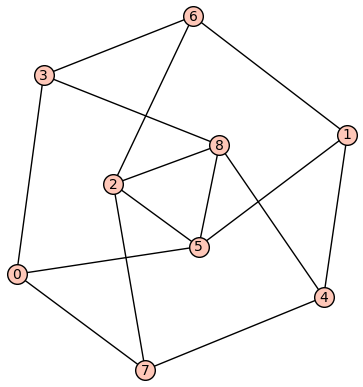


*** OBRAVNAVAM µ = 8 (n=9) ***
  MIN=634, MAX=2135


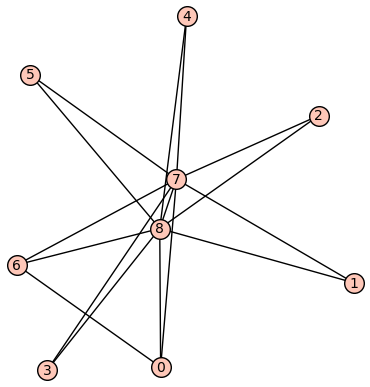

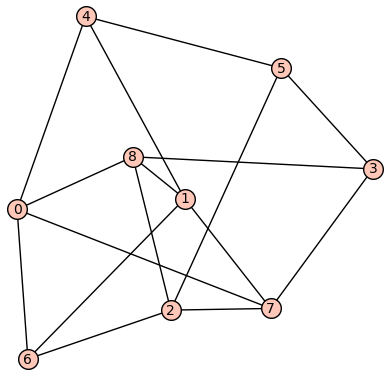


*** OBRAVNAVAM µ = 9 (n=9) ***
  MIN=949, MAX=3246


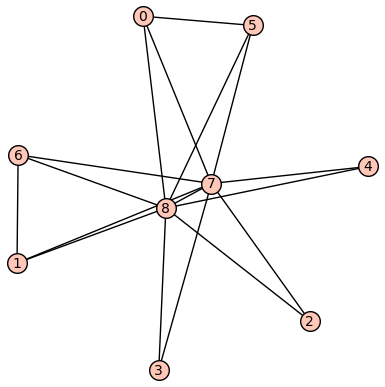

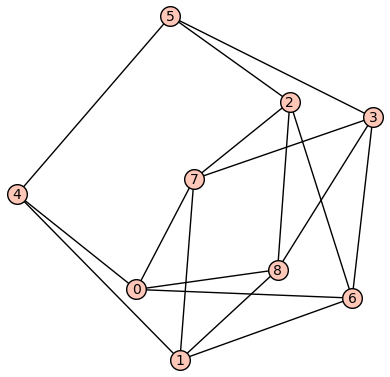


*** OBRAVNAVAM µ = 10 (n=9) ***
  MIN=1416, MAX=4757


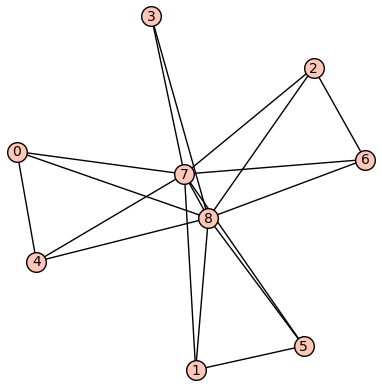

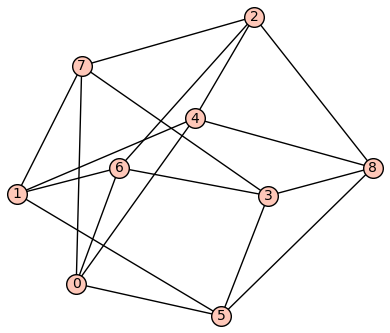


*** OBRAVNAVAM µ = 11 (n=9) ***
  MIN=2149, MAX=6517


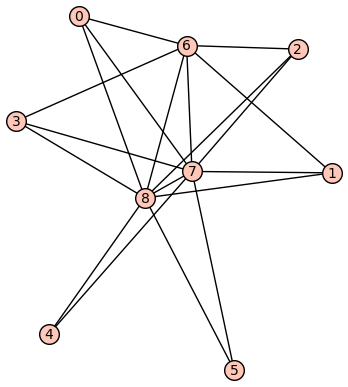

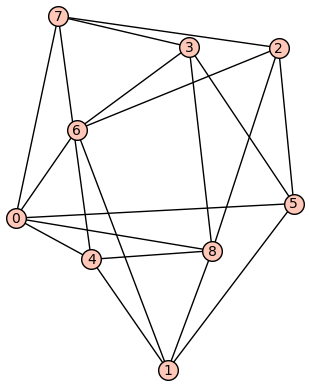


*** OBRAVNAVAM µ = 12 (n=9) ***
  MIN=2948, MAX=8960


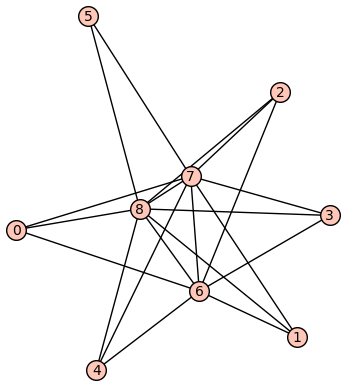

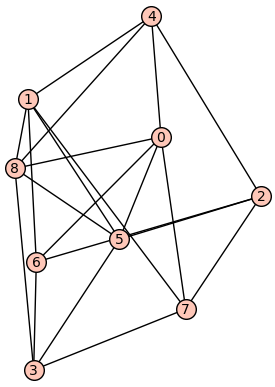


*** OBRAVNAVAM µ = 13 (n=9) ***
  MIN=3894, MAX=12474


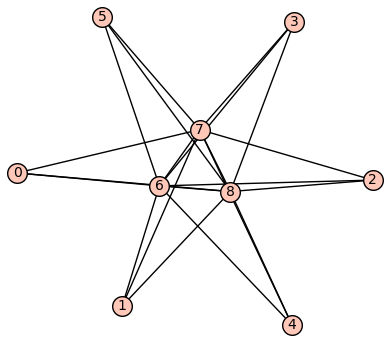

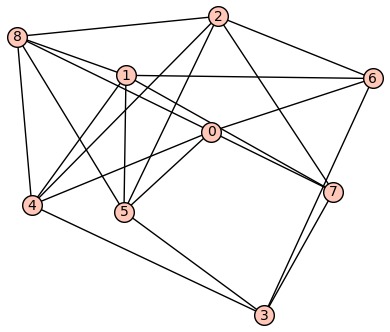


*** OBRAVNAVAM µ = 14 (n=9) ***
  MIN=6055, MAX=17221


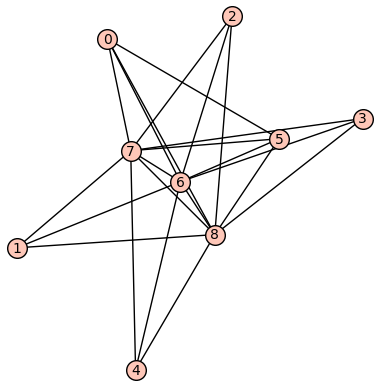

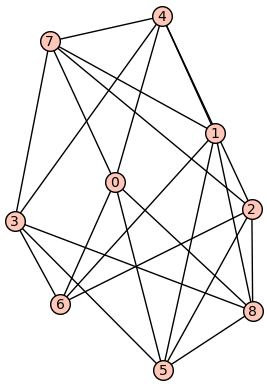


*** OBRAVNAVAM µ = 15 (n=9) ***
  MIN=9291, MAX=22951


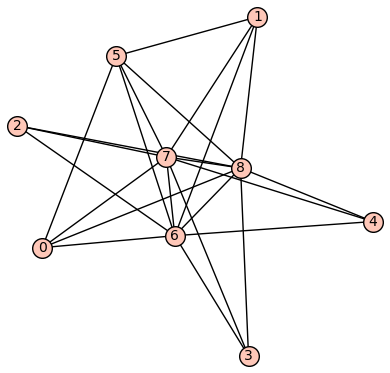

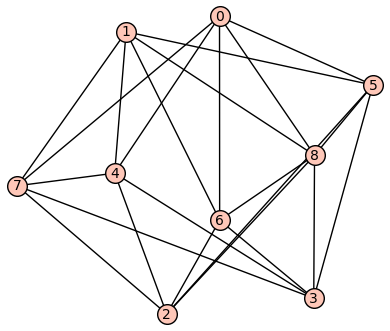


*** OBRAVNAVAM µ = 16 (n=9) ***
  MIN=13602, MAX=29685


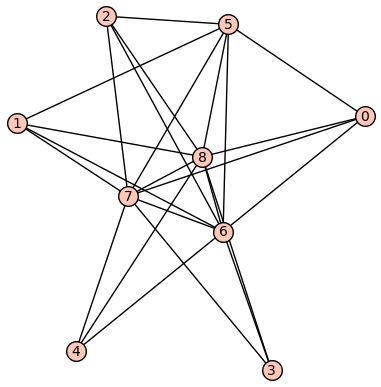

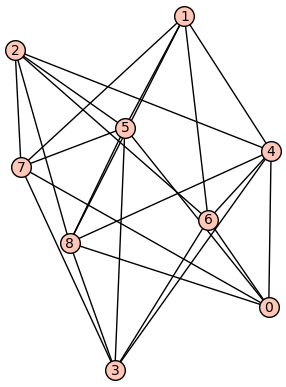


*** OBRAVNAVAM µ = 17 (n=9) ***
  MIN=18988, MAX=38800


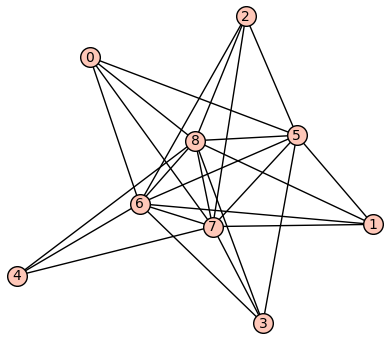

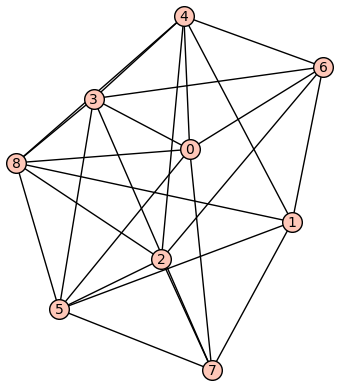


*** OBRAVNAVAM µ = 18 (n=9) ***
  MIN=25449, MAX=50877


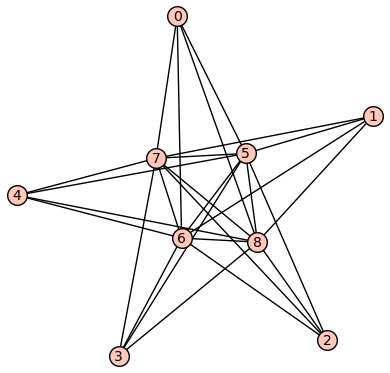

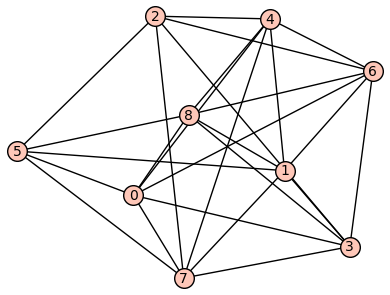


*** OBRAVNAVAM µ = 19 (n=9) ***
  MIN=37974, MAX=67563


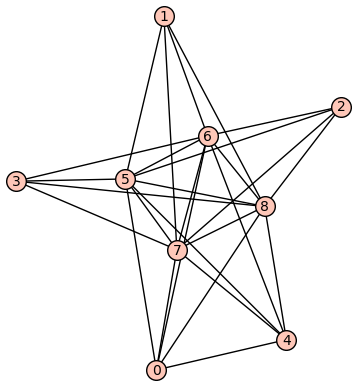

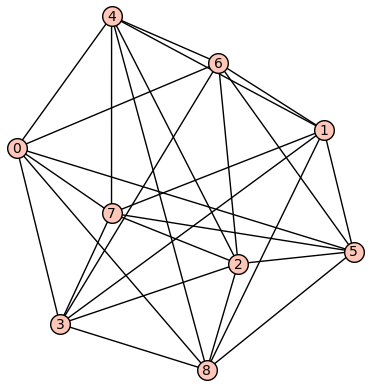


*** OBRAVNAVAM µ = 20 (n=9) ***
  MIN=53500, MAX=84466


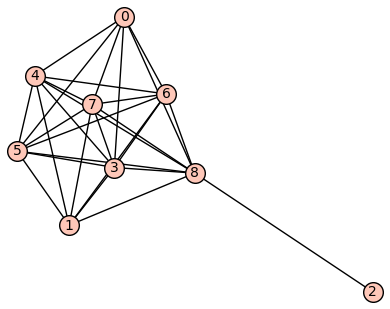

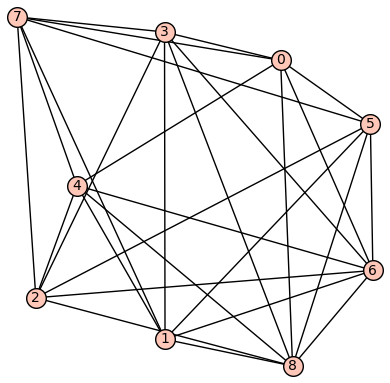


*** OBRAVNAVAM µ = 21 (n=9) ***
  MIN=68505, MAX=106281


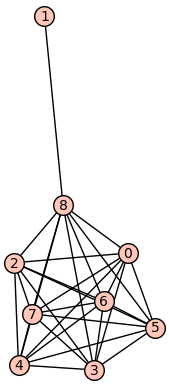

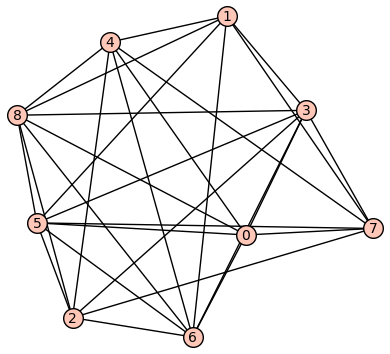


*** OBRAVNAVAM µ = 22 (n=9) ***
  MIN=93948, MAX=134712


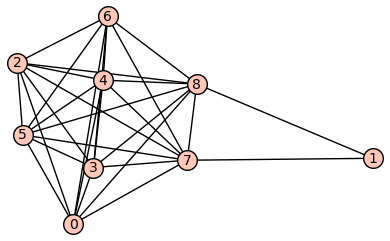

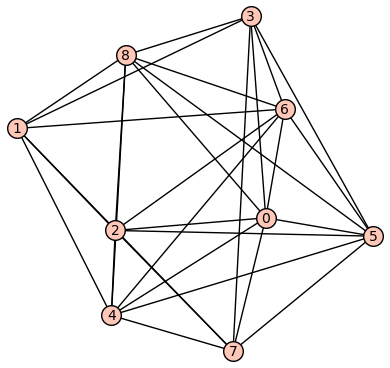


*** OBRAVNAVAM µ = 23 (n=9) ***
  MIN=131134, MAX=171019


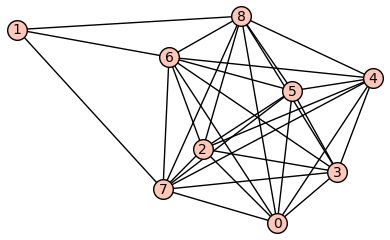

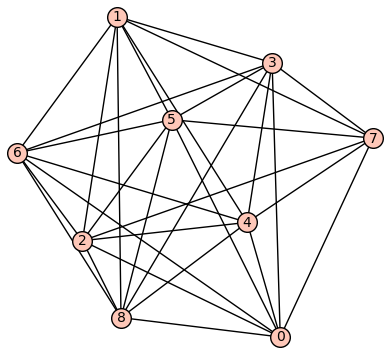


*** OBRAVNAVAM µ = 24 (n=9) ***
  MIN=180063, MAX=213573


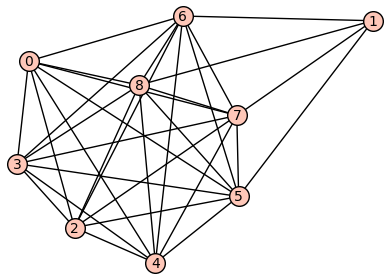

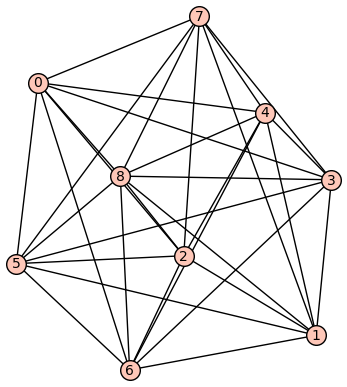


*** OBRAVNAVAM µ = 25 (n=9) ***
  MIN=240735, MAX=261546


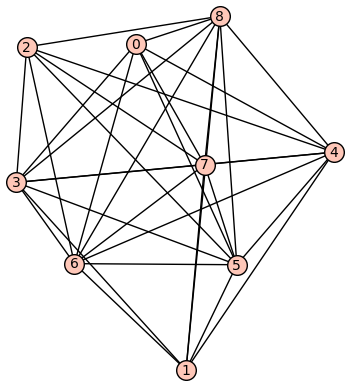

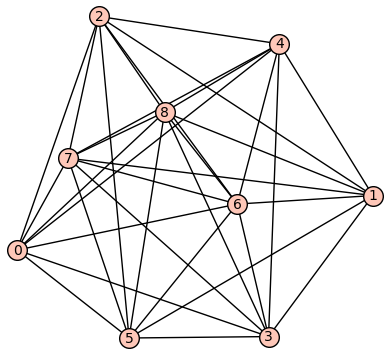


*** OBRAVNAVAM µ = 26 (n=9) ***
  MIN=313150, MAX=321631


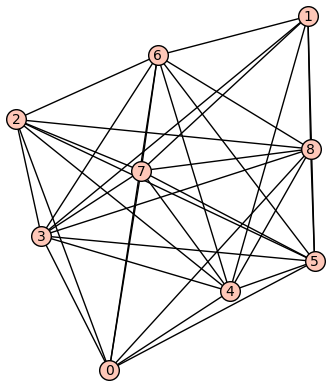

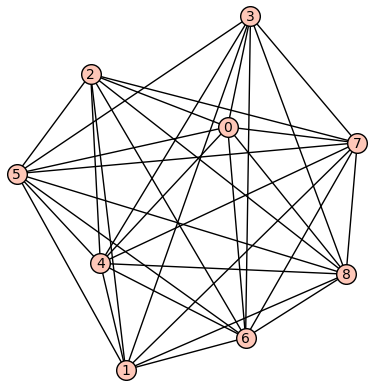


*** OBRAVNAVAM µ = 27 (n=9) ***
  MIN=397308, MAX=397308


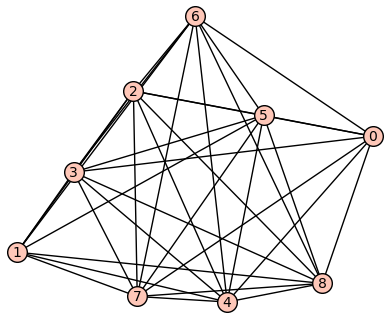

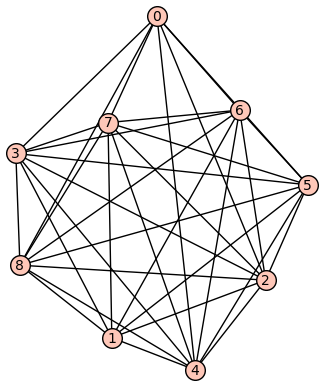


*** OBRAVNAVAM µ = 28 (n=9) ***
  MIN=493209, MAX=493209


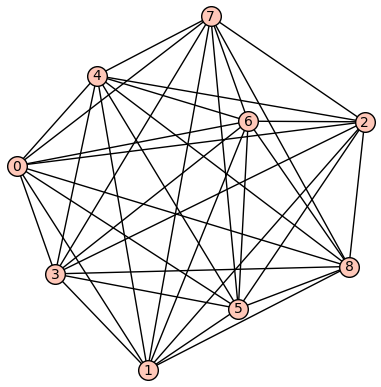

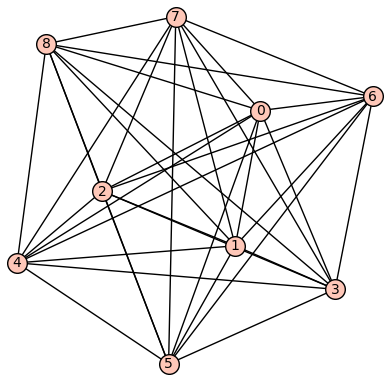

In [11]:
from sage.all import *
import pandas as pd
import os

def cyclomatic_number(G):
    return G.size() - G.order() + G.connected_components_number()

def all_simple_paths(G, start, end, visited=None):
    if visited is None:
        visited = []
    visited = visited + [start]

    if start == end:
        return [visited]

    paths = []
    for nei in G.neighbors(start):
        if nei not in visited:
            for p in all_simple_paths(G, nei, end, visited):
                paths.append(p)
    return paths

def subpath_number(G):
    V = list(G.vertices())
    total = 0
    for i in range(len(V)):
        for j in range(i, len(V)):
            total += len(all_simple_paths(G, V[i], V[j]))
    return total


# ---------------- CSV INIT ----------------
CSV_FILE = "rezultati_subpath_live.csv"

if not os.path.exists(CSV_FILE):
    pd.DataFrame(columns=["n","mu","min_pn","min_g6","max_pn","max_g6"])\
        .to_csv(CSV_FILE, index=False)


def save_live(n, mu, min_pn, min_g6, max_pn, max_g6):
    df = pd.read_csv(CSV_FILE)

    df = df[~((df["n"] == n) & (df["mu"] == mu))]

    df.loc[len(df)] = [
        int(n), int(mu),
        min_pn, min_g6,
        max_pn, max_g6
    ]

    df.to_csv(CSV_FILE, index=False)


# ---------------- GLAVNI PROGRAM ----------------
for n in range(3, 10):

    print(f"\n>>> ZAČENJAM n = {n}")

    # 1) ZBEREMO GRAFE PO µ
    bucket = {}
    for G in graphs(n):
        if not G.is_connected():
            continue
        mu = cyclomatic_number(G)
        bucket.setdefault(mu, []).append(G)

    # 2) OBRAVNAVAMO µ PO VRSTI — takojšnja obdelava + zapis
    for mu in sorted(bucket.keys()):
        print(f"\n*** OBRAVNAVAM µ = {mu} (n={n}) ***")

        best_min = None
        best_max = None

        for G in bucket[mu]:
            pn = subpath_number(G)
            g6 = G.graph6_string()

            # MIN
            if best_min is None or pn < best_min[0]:
                best_min = (pn, g6, G.copy())

            # MAX
            if best_max is None or pn > best_max[0]:
                best_max = (pn, g6, G.copy())

        # PO ZAKLJUČKU µ — takojšnji zapis!
        min_pn, min_g6, Gmin = best_min
        max_pn, max_g6, Gmax = best_max

        print(f"  MIN={min_pn}, MAX={max_pn}")
        Gmin.show()
        Gmax.show()

        save_live(n, mu, min_pn, min_g6, max_pn, max_g6)



In [ ]:
# === Projekt: Subpath number pri grafih z danim ciklomatskim številom ===
# Delo v CoCalc-u (SageMath kernel)

import itertools
from sage.all import *
import pandas as pd


# -------------------------------
# Funkcija za ciklomatsko število
# -------------------------------
def cyclomatic_number(G):
    """Vrne ciklomatsko število grafa G."""
    return G.size() - G.order() + G.connected_components_number()


# -------------------------------
# Funkcija za štetje vseh enostavnih poti
# -------------------------------
def all_simple_paths(G, start, end, visited=None):
    """Rekurzivno poišče vse enostavne poti med start in end."""
    if visited is None:
        visited = []
    visited = visited + [start]
    if start == end:
        return [visited]
    paths = []
    for neighbor in G.neighbors(start):
        if neighbor not in visited:
            newpaths = all_simple_paths(G, neighbor, end, visited)
            for p in newpaths:
                paths.append(p)
    return paths


def subpath_number(G):
    """Vrne skupno število enostavnih poti (vključno z dolžino 0)."""
    V = list(G.vertices())
    n_paths = 0
    for i in range(len(V)):
        for j in range(i, len(V)):
            n_paths += len(all_simple_paths(G, V[i], V[j]))
    return n_paths


# -------------------------------
# Glavni izračun
# -------------------------------
rezultati = []  # seznam (n, µ, subpath_number)

# Za n = 3 do 8
for n in range(8, 10):
    print(f"\nObdelujem grafe z n = {n} vozlišči ...")

    max_edges = n * (n - 1) // 2  # maksimalno število povezav

    # Za vsa možna ciklomatska števila µ
    for mu in range(0, max_edges - n + 2):
        m = mu + n - 1  # izpeljano iz µ = m - n + 1

        if m > max_edges:
            continue

        print(f"  → µ = {mu}, m = {m}")

        # Generiramo vse neizomorfne grafe z n vozlišči in m povezavami
        for G in graphs.nauty_geng(f"{n} {m}:{m}"):
            if not G.is_connected():
                continue

            pn = subpath_number(G)
            rezultati.append((n, mu, pn))

print("\n--- Izračun končan ---")

# Pretvori rezultate v DataFrame
df = pd.DataFrame(rezultati, columns=["n", "µ(G)", "p_n(G)"])

# Izračunaj minimalni in maksimalni subpath number za vsako kombinacijo (n, µ)
tabela = (
    df.groupby(["n", "µ(G)"])
    .agg(min_pn=("p_n(G)", "min"), max_pn=("p_n(G)", "max"), count=("p_n(G)", "count"))
    .reset_index()
)

# Izpiši tabelo rezultatov
print("\nTabela1 ekstremov (min / max subpath number):")
show(tabela)

# Shranimo tabelo kot CSV
tabela.to_csv("rezultati_subpath.csv", index=False)
print("\nRezultati shranjeni v datoteko 'rezultati_subpath1.csv'.")


In [ ]:
import itertools
from sage.all import *
import pandas as pd
import os

# --------------------------------------------------
# Funkcija za ciklomatsko število
# --------------------------------------------------
def cyclomatic_number(G):
    return G.size() - G.order() + G.connected_components_number()

# --------------------------------------------------
# Funkcija za štetje enostavnih poti
# --------------------------------------------------
def all_simple_paths(G, start, end, visited=None):
    if visited is None:
        visited = []
    visited = visited + [start]
    if start == end:
        return [visited]
    paths = []
    for nei in G.neighbors(start):
        if nei not in visited:
            newp = all_simple_paths(G, nei, end, visited)
            paths.extend(newp)
    return paths

def subpath_number(G):
    V = G.vertices()
    total = 0
    for i in range(len(V)):
        for j in range(i, len(V)):
            total += len(all_simple_paths(G, V[i], V[j]))
    return total


# --------------------------------------------------
# Glavni izračun – z enoličnim zapisom grafov (graph6)
# --------------------------------------------------

os.makedirs("slike_min", exist_ok=True)
os.makedirs("slike_max", exist_ok=True)

rezultat_vrstice = []   # za CSV

for n in range(3, 9):
    print(f"\nObdelujem vse povezane grafe z n = {n} vozlišči ...")

    po_mu = {}   # mu : list of (pn, G)

    for G in graphs(n):
        if not G.is_connected():
            continue

        mu = cyclomatic_number(G)
        pn = subpath_number(G)

        if mu not in po_mu:
            po_mu[mu] = []
        po_mu[mu].append((pn, G))

    # min/max
    for mu in sorted(po_mu.keys()):
        seznam = sorted(po_mu[mu], key=lambda x: x[0])

        min_pn, G_min = seznam[0]
        max_pn, G_max = seznam[-1]

        # --- slike ---
        min_slika = f"slike_min/graf_min_n{n}_mu{mu}.png"
        max_slika = f"slike_max/graf_max_n{n}_mu{mu}.png"

        G_min.plot().save(min_slika)
        G_max.plot().save(max_slika)

        # --- enoličen zapis grafa (graph6) ---
        g6_min = G_min.graph6_string()
        g6_max = G_max.graph6_string()

        # --- zapišemo v tabelo ---
        rezultat_vrstice.append([n, mu, min_pn, max_pn,
                                 min_slika, max_slika,
                                 g6_min, g6_max])

print("\n--- Izračun končan ---")


# --------------------------------------------------
# CSV izpis
# --------------------------------------------------

df = pd.DataFrame(
    rezultat_vrstice,
    columns=[
        "n",
        "µ(G)",
        "min p_n(G)",
        "max p_n(G)",
        "slika_min",
        "slika_max",
        "graph6_min",
        "graph6_max"
    ]
)

df.to_csv("rezultati_subpath_grafi_enolicni.csv", index=False)


In [ ]:
# risanje konkretnih grafov

g6 = "F~~~w"       # tvoj graph6 niz
G = Graph(g6)     # rekonstruira graf
G.show()  